<a href="https://colab.research.google.com/github/405620294/iShape/blob/main/nn/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

# explore data

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
transform = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

frog


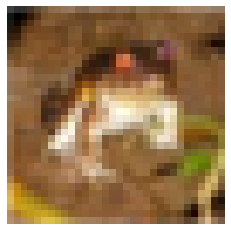

In [ ]:
import matplotlib.pyplot as plt
print(transform[y_train[0][0]])
plt.axis('off')
plt.imshow(x_train[0])

# precrocessing

In [ ]:
# X > 歸一化
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
# y > one hot encoding > 太占用容量 > 改用 SparseCategoricalCrossentropy

# creat a model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

layers = [
      # (3*3*3)*64=1728+64(bias)=1792
      Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32,32,3)),
      # no param
      MaxPooling2D(),
      # (3*3*64)*128+128=73856
      Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
      # no param
      MaxPooling2D(),
      # (3*3*128)*256+256=295128
      Conv2D(256, 3, strides=1, padding='same', activation='relu'),
      # no param 
      MaxPooling2D(),
      # no param, shape:4*4*256=4096
      Flatten(),
      # 4096*128+128=524416
      Dense(128, activation='relu'), 
      # no param
      Dropout(0.25),
      # 128*10+10=1290
      Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
layers = [
      # (3*3)*3*64+64=1792
      Conv2D(64, 3, strides=1, padding='same', activation='relu', input_shape=(32,32,3)),
      # no parma
      MaxPooling2D(),
      # (3*3)*64*128+128=73856
      Conv2D(128, 3, strides=1, padding='same', activation='relu'),
      # no param
      MaxPooling2D(),
      # (3*3)*128*256+256=295168
      Conv2D(256, 3, strides=1, padding='same', activation='relu'),
      # no param
      MaxPooling2D(),
      GlobalAveragePooling2D(),
      # 256*10+10=2570
      Dense(10, activation='softmax')
]

model2 = Sequential(layers)
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)              

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model2.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, restore_best_weights=True)
model.fit(x_train_norm, y_train, batch_size=100, epochs=50, verbose=2, validation_split=0.2, callbacks=callback)

Epoch 1/50
400/400 - 4s - loss: 1.6017 - accuracy: 0.4143 - val_loss: 1.2559 - val_accuracy: 0.5626
Epoch 2/50
400/400 - 3s - loss: 1.1775 - accuracy: 0.5819 - val_loss: 1.0290 - val_accuracy: 0.6265
Epoch 3/50
400/400 - 3s - loss: 0.9791 - accuracy: 0.6594 - val_loss: 0.8663 - val_accuracy: 0.6985
Epoch 4/50
400/400 - 3s - loss: 0.8495 - accuracy: 0.7026 - val_loss: 0.8258 - val_accuracy: 0.7092
Epoch 5/50
400/400 - 3s - loss: 0.7503 - accuracy: 0.7370 - val_loss: 0.8072 - val_accuracy: 0.7180
Epoch 6/50
400/400 - 3s - loss: 0.6696 - accuracy: 0.7657 - val_loss: 0.7345 - val_accuracy: 0.7462
Epoch 7/50
400/400 - 3s - loss: 0.5988 - accuracy: 0.7879 - val_loss: 0.7502 - val_accuracy: 0.7467
Epoch 8/50
400/400 - 3s - loss: 0.5294 - accuracy: 0.8117 - val_loss: 0.7452 - val_accuracy: 0.7581
Epoch 9/50
400/400 - 3s - loss: 0.4603 - accuracy: 0.8360 - val_loss: 0.7440 - val_accuracy: 0.7620
Epoch 10/50
400/400 - 3s - loss: 0.4070 - accuracy: 0.8560 - val_loss: 0.7790 - val_accuracy: 0.7527

In [ ]:
callback = EarlyStopping(patience=20, restore_best_weights=True)
model2.fit(x_train_norm, y_train, batch_size=100, epochs=50, validation_split=0.2, callbacks=callback, verbose=2)

Epoch 1/50
400/400 - 4s - loss: 1.7553 - accuracy: 0.3488 - val_loss: 1.5106 - val_accuracy: 0.4537
Epoch 2/50
400/400 - 3s - loss: 1.4323 - accuracy: 0.4850 - val_loss: 1.3418 - val_accuracy: 0.5114
Epoch 3/50
400/400 - 3s - loss: 1.2628 - accuracy: 0.5492 - val_loss: 1.1934 - val_accuracy: 0.5762
Epoch 4/50
400/400 - 3s - loss: 1.1578 - accuracy: 0.5879 - val_loss: 1.1450 - val_accuracy: 0.5869
Epoch 5/50
400/400 - 3s - loss: 1.0870 - accuracy: 0.6141 - val_loss: 1.1137 - val_accuracy: 0.6116
Epoch 6/50
400/400 - 3s - loss: 1.0086 - accuracy: 0.6466 - val_loss: 1.0668 - val_accuracy: 0.6269
Epoch 7/50
400/400 - 3s - loss: 0.9543 - accuracy: 0.6646 - val_loss: 1.0023 - val_accuracy: 0.6460
Epoch 8/50
400/400 - 3s - loss: 0.8979 - accuracy: 0.6858 - val_loss: 0.9708 - val_accuracy: 0.6587
Epoch 9/50
400/400 - 3s - loss: 0.8529 - accuracy: 0.7042 - val_loss: 0.8890 - val_accuracy: 0.6970
Epoch 10/50
400/400 - 3s - loss: 0.8063 - accuracy: 0.7196 - val_loss: 0.9470 - val_accuracy: 0.6707

# evaluating

In [ ]:
print(model.evaluate(x_test_norm, y_test))
print(model2.evaluate(x_test_norm, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.7529 - accuracy: 0.7370
[0.7528827786445618, 0.7369999885559082]
313/313 [==============================] - 1s 3ms/step - loss: 0.7254 - accuracy: 0.7647
[0.7253508567810059, 0.7646999955177307]


In [30]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = model2.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre), 
             columns=[transform[i]+'(預測)' for i in range(10)], 
             index=[transform[i]+'(真實)' for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),777,19,58,21,11,5,6,9,58,36
automobile(真實),10,897,5,7,2,2,1,3,16,57
bird(真實),50,3,696,55,49,62,42,22,9,12
cat(真實),14,9,69,565,41,193,52,32,13,12
deer(真實),22,3,81,56,670,57,41,59,8,3
dog(真實),7,3,32,117,28,742,20,32,12,7
frog(真實),2,7,52,68,32,29,798,3,7,2
horse(真實),8,6,32,32,39,64,5,803,1,10
ship(真實),61,25,15,16,3,5,3,2,852,18
truck(真實),19,78,8,17,3,5,4,7,12,847


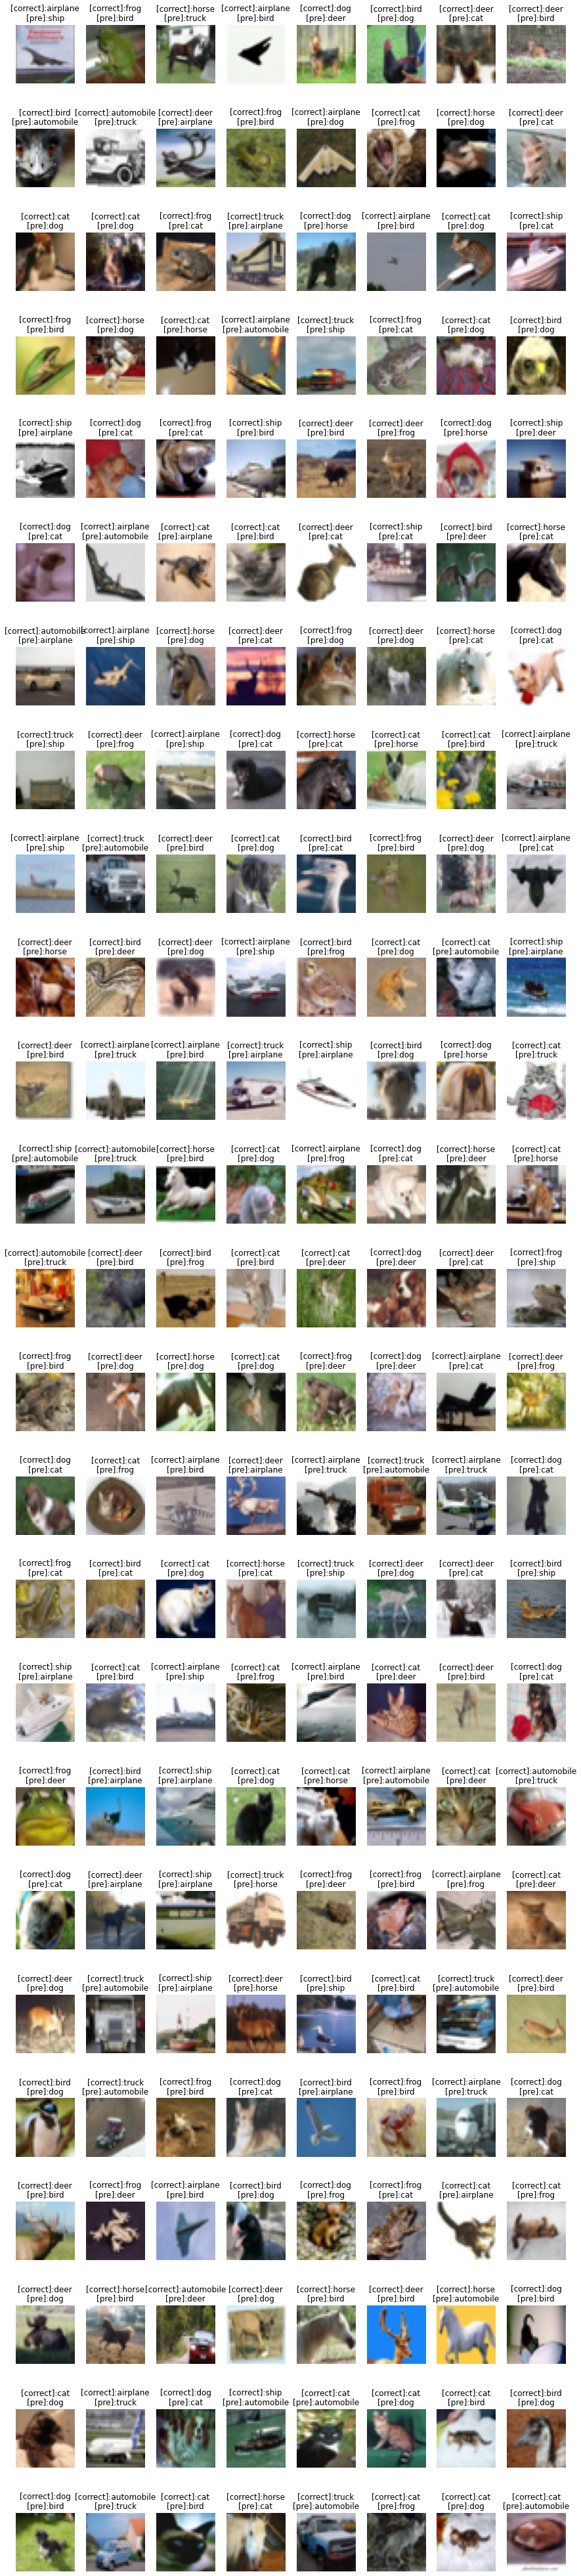

In [31]:
import numpy as np
y_test_re = y_test.reshape(-1)
idx = np.nonzero(pre != y_test_re)[0][:200]
wrong_img, wrong_pre, wrong_label = x_test[idx], pre[idx], y_test_re[idx]
plt.figure(figsize=(15,75))
w = 8
h = len(idx) / w + 1
for i in range(len(idx)):
  plt.subplot(h, w, i+1)
  plt.imshow(wrong_img[i])
  t = '[correct]:{0}\n[pre]:{1}'.format(transform[wrong_label[i]], transform[wrong_pre[i]])
  plt.title(t)
  plt.axis('off')

# make a predict

https://t2.gstatic.com/licensed-image?q=tbn:ANd9GcRXCXyOqY667HgF5dUbIi78nHqXIhuzps4Rkllo47a4eZIBPD9MsRagpzj0X7Hvb5bZ_58zHRUCjvW6gNxFK0o
predict: airplane
                機率
airplane    0.9996
automobile  0.0000
bird        0.0001
cat         0.0000
deer        0.0000
dog         0.0000
frog        0.0000
horse       0.0000
ship        0.0003
truck       0.0000


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


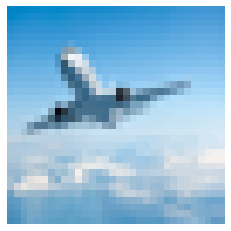

In [37]:
import requests
from PIL import Image

url = input()
header = {
      'Referer': 'https://www.google.com/',
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'
}

reponse = requests.get(str(url), headers=header,  stream=True, verify=False)
image_raw = Image.open(reponse.raw).resize((32,32)).convert('RGB')
image = np.array(image_raw)
image = image.reshape(1, 32, 32, 3) / 255
probability = np.round(model2.predict(image)[0], 4)

print('predict:', transform[model.predict_classes(image)[0]])
print(pd.DataFrame(probability, index=transform, columns=['機率']))
plt.axis('off')
plt.imshow(image_raw)